In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Gérer les données manquantes

In [3]:
df = df.fillna(df.median())

# Capturer les features d'intérêt

In [4]:
def get_cabin_letter(x):
    if type(x) is str:
        return x[0]
    else:
        return ''

In [5]:
df['Cabin_letter'] = df.Cabin.apply(get_cabin_letter)
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], errors='ignore')
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_letter
0,0,3,male,22.0,1,0,7.2500,S,
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,
887,1,1,female,19.0,0,0,30.0000,S,B
888,0,3,female,28.0,1,2,23.4500,S,
889,1,1,male,26.0,0,0,30.0000,C,C


# Gérer les données catégoriques

In [6]:
df = pd.get_dummies(df, columns=['Embarked', 'Sex', 'Cabin_letter', 'Pclass'], drop_first=True)
df

,Survived,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male,Cabin_letter_A,Cabin_letter_B,Cabin_letter_C,Cabin_letter_D,Cabin_letter_E,Cabin_letter_F,Cabin_letter_G,Cabin_letter_T,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,0,1,1,0,0,0,0,0,0,0,0,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,0,0,0,0,0,0,0,0,1
3,1,35.0,1,0,53.1000,0,1,0,0,0,1,0,0,0,0,0,0,0
4,0,35.0,0,0,8.0500,0,1,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,0,1,1,0,0,0,0,0,0,0,0,1,0
887,1,19.0,0,0,30.0000,0,1,0,0,1,0,0,0,0,0,0,0,0
888,0,28.0,1,2,23.4500,0,1,0,0,0,0,0,0,0,0,0,0,1
889,1,26.0,0,0,30.0000,0,0,1,0,0,1,0,0,0,0,0,0,0


# Séparer les données en train et test set

In [7]:
X = df.loc[:, df.columns != 'Survived']
y = df.loc[:, df.columns == 'Survived']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=df.Survived)

# Standardiser les données

In [26]:
X_train_std = X_train[:]
mean = X_train[['Age', 'Fare']].mean()
std = X_train[['Age', 'Fare']].std()
X_train_std[['Age', 'Fare']] = (X_train[['Age', 'Fare']] - mean)/std

X_test_std = X_test[:]
X_test_std[['Age', 'Fare']] = (X_test[['Age', 'Fare']] - mean)/std

# Entrainer les modèles de votre choix

In [27]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

models = [ LogisticRegression(max_iter=10_000),
            SGDClassifier(penalty='elasticnet', fit_intercept=False),
            SVC(),
            DecisionTreeClassifier(),
            RandomForestClassifier(),
            KNeighborsClassifier(),
         ]

for model in models:
    model.fit(X_train_std, y_train.iloc[:,0])

# Comparer leurs performances 

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
for model in models:
    print(model)
    print(accuracy_score(y_test, model.predict(X_test)))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
0.7892376681614349
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=False,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='elasticnet', power_t=0.5, random_state=None,
              shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
              warm_start=False)
0.757847533632287
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, ran

# Quelles sont les features les plus intéressantes?

In [30]:
pd.Series(models[-2].feature_importances_, index=X_train_std.columns).sort_values(ascending=False)

Fare              0.252059
Sex_male          0.245863
Age               0.235734
Pclass_3          0.061176
SibSp             0.048114
Parch             0.041786
Embarked_S        0.024844
Cabin_letter_D    0.019158
Pclass_2          0.015593
Cabin_letter_E    0.014671
Cabin_letter_C    0.011691
Embarked_Q        0.010633
Cabin_letter_B    0.007828
Cabin_letter_A    0.004157
Cabin_letter_F    0.004002
Cabin_letter_G    0.002258
Cabin_letter_T    0.000434
dtype: float64

# De quelle façon le sexe affecte-t-il le taux de survie?

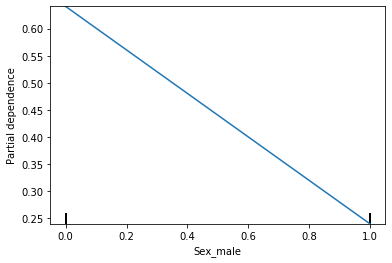

In [32]:
from sklearn.inspection import plot_partial_dependence
plot_partial_dependence(models[-2], X_train_std, ['Sex_male'], target=1, n_jobs=-1) 
plt.show()

# De quelle façon la classe (Pclass) affecte-t-elle le taux de survie? et les autres features?

/home/alexisfortin-cote/miniconda3/envs/data-science/lib/python3.7/site-packages/sklearn/inspection/_partial_dependence.py:715: FutureWarning: The fig parameter is deprecated in version 0.22 and will be removed in version 0.24
  FutureWarning)


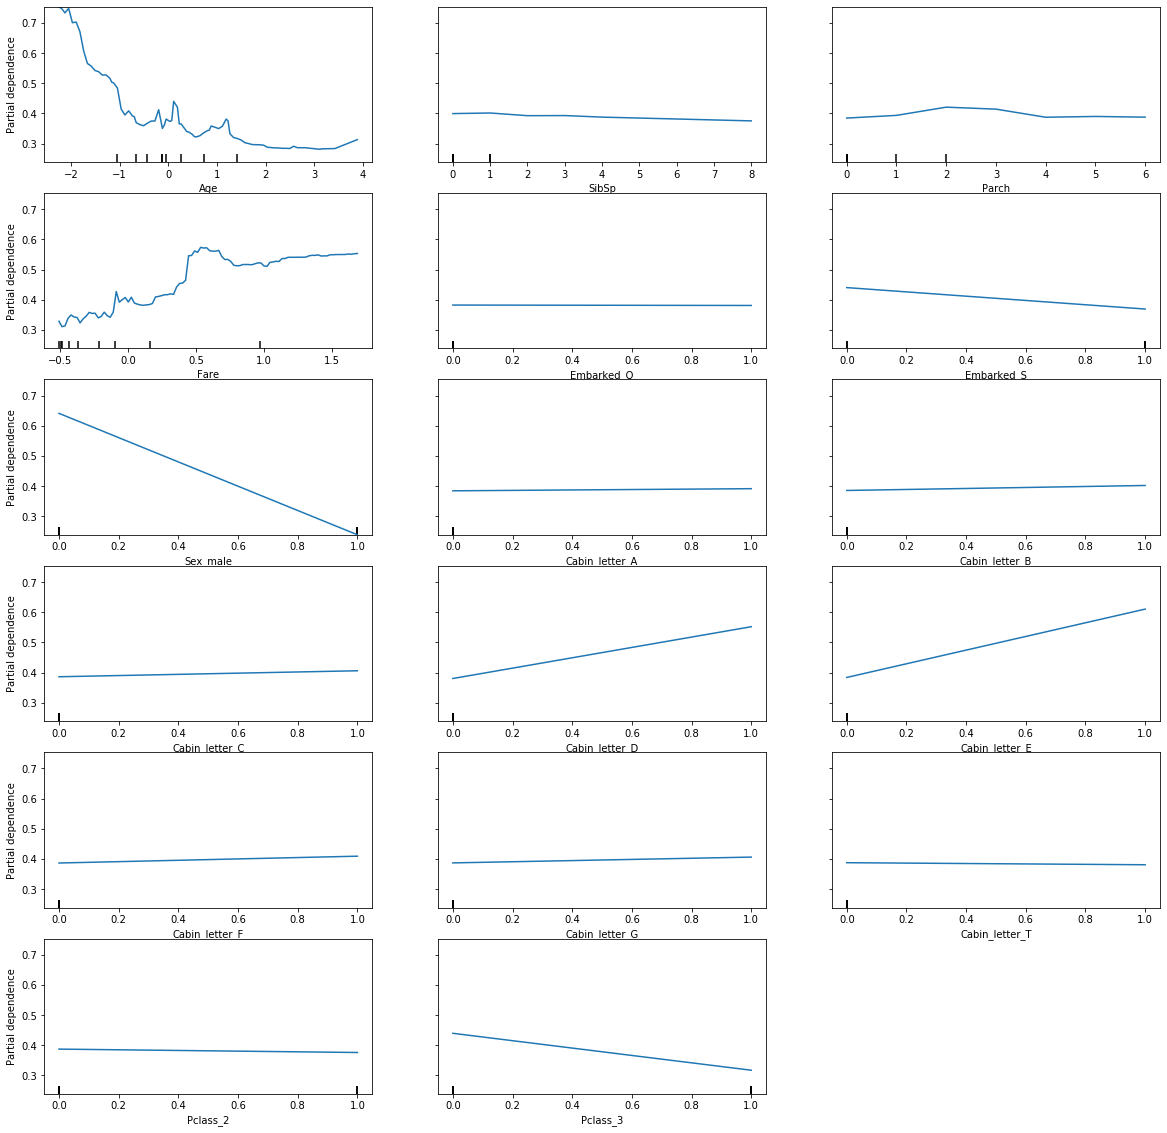

In [33]:
fig = plt.figure(figsize=(20,20))
plot_partial_dependence(models[-2], X_train_std,X_train_std.columns, target=1, n_jobs=-1, fig=fig) 
plt.show()